In [1]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/../src/simulations_v2")
    sys.path.append(module_path + "/..")
from load_params import load_params

from multi_group_simulation import MultiGroupSimulation

In [2]:
from util_functions import *
from uncertainty_analysis import *
from sim_helper_functions import *

# Asymptomatic Perc Mult

In [21]:
centre_sensitivity_sim_files = []
for i in range(13):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/sensitivity_sims/asymp_prob_mult_timestamp_1620184368/centre_mult_{}.dill'.format(i)
    centre_sensitivity_sim_files.append(fname)

pess_sensitivity_sim_files = []
for i in range(13):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/sensitivity_sims/asymp_prob_mult_timestamp_1620184368/pess_mult_{}.dill'.format(i)
    pess_sensitivity_sim_files.append(fname)

In [24]:
centre_sensitivity_data = load_lhs_output(centre_sensitivity_sim_files)
pess_sensitivity_data = load_lhs_output(pess_sensitivity_sim_files)
centre_sensitivity_data, pess_sensitivity_data

(    asymp_prob_mult  inital_prev_mult   R0  outside_inf_mult  \
 0          0.971507               1.0  2.5               1.0   
 1          1.000000               1.0  2.5               1.0   
 2          1.028493               1.0  2.5               1.0   
 3          1.056986               1.0  2.5               1.0   
 4          1.085479               1.0  2.5               1.0   
 5          1.113972               1.0  2.5               1.0   
 6          1.142465               1.0  2.5               1.0   
 7          1.170958               1.0  2.5               1.0   
 8          1.199451               1.0  2.5               1.0   
 9          1.227944               1.0  2.5               1.0   
 10         1.256437               1.0  2.5               1.0   
 11         1.284930               1.0  2.5               1.0   
 12         1.313423               1.0  2.5               1.0   
 
     daily_self_report_prob  ct_mult  ct_testing_ratio  test_sensitivity  \
 0          

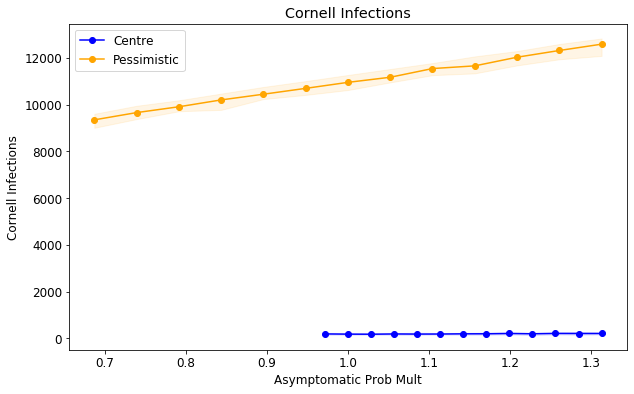

In [23]:
plt.figure(figsize=(10,6))

plt.plot('asymp_prob_mult', 'res_cornell_inf_50', marker='o', label='Centre', color='blue', data=centre_sensitivity_data)
plt.fill_between('asymp_prob_mult', y1='res_cornell_inf_10', y2='res_cornell_inf_90', data=centre_sensitivity_data, alpha=0.1, color='blue')
plt.plot('asymp_prob_mult', 'res_cornell_inf_50', marker='o', label='Pessimistic', color='orange', data=pess_sensitivity_data)
plt.fill_between('asymp_prob_mult', y1='res_cornell_inf_10', y2='res_cornell_inf_90', data=pess_sensitivity_data, alpha=0.1, color='orange')

plt.legend()
plt.title('Cornell Infections')
plt.ylabel('Cornell Infections')
plt.xlabel('Asymptomatic Prob Mult')

plt.show()